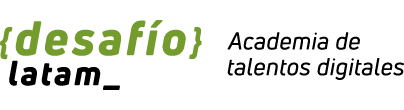

<center><h1>  <font color='green'> Solución desafío - Manipulación y transformación de datos II</font></h1></center>
<hr>

- Carga los datos de cada pestaña del archivo US_Regional_Sales_Data.xlsx en un DataFrame independiente.

In [1]:
import pandas as pd
import numpy as np

df_sales = pd.read_excel("US_Regional_Sales_Data.xlsx", sheet_name = 'Sales Orders Sheet')
df_customers = pd.read_excel("US_Regional_Sales_Data.xlsx", sheet_name = 'Customers Sheet')
df_stores = pd.read_excel("US_Regional_Sales_Data.xlsx", sheet_name = 'Store Locations Sheet')
df_products = pd.read_excel("US_Regional_Sales_Data.xlsx", sheet_name = 'Products Sheet')
df_teams = pd.read_excel("US_Regional_Sales_Data.xlsx", sheet_name = 'Sales Team Sheet')


- Cruza todos los DataFrames usando validación many_to_one, y guarda el resultado en una nueva variable llamada df_base.

In [2]:
df_base = df_sales.\
            merge(df_stores, validate = 'many_to_one').\
            merge(df_customers, validate = 'many_to_one').\
            merge(df_products, validate = 'many_to_one').\
            merge(df_teams, validate = 'many_to_one')

df_base

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1     SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2     SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3     SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4     SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   
...            ...           ...           ...          ...        ...   
7986  SO - 0006787   Distributor  WARE-NMK1003   2020-03-10 2020-07-30   
7987  SO - 0006896   Distributor  WARE-NBV1002   2020-03-10 2020-08-13   
7988  SO - 0004684     Wholesale  WARE-NMK1003   2019-08-23 2019-11-27   
7989  SO - 0006404     Wholesale  WARE-NBV1002   2020-03-10 2020-06-16   
7990  SO - 0004815   Distributor  WARE-UHY1004   2019-08-23 2019-12-14   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0    2018-06-14   2018-06-19          USD             6           15  ...   
1    2019-03-25   2019-03-30          USD             6           11  ...   
2    2018-11-11   2018-11-17          USD             6           12  ...   
3    2020-01-28   2020-01-31          USD             6            7  ...   
4    2019-03-06   2019-03-10          USD             6           33  ...   
...         ...          ...          ...           ...          ...  ...   
7986 2020-08-09   2020-08-17          USD            25            9  ...   
7987 2020-08-22   2020-09-01          USD            25           10  ...   
7988 2019-12-14   2019-12-23          USD            25           17  ...   
7989 2020-06-19   2020-06-20          USD            25           17  ...   
7990 2019-12-20   2019-12-29          USD            25            6  ...   

      Population  Household Income  Median Income  Land Area  Water Area  \
0         213776             68789          80327  135481314   160302131   
1         153515             57025          36568  645603627    14488557   
2         456568            174441          54527  506667557      947196   
3         258071            110549          31918  104592941    31362925   
4         223182             88401          43911  121034884           0   
...          ...               ...            ...        ...         ...   
7986      218281             86916          50323  212601021     1845301   
7987      109708             36973          55102   77834895    58171749   
7988      113236             44154          44302  118291390      259404   
7989      335400             74757          52253   70306781      638460   
7990      102105             33375          79720   60235960     3515266   

                         Time Zone Customer Names      Product Name  \
0                 America/New York  Rochester Ltd  Dining Furniture   
1                 America/New York     Apollo Ltd  Dining Furniture   
2                   America/Denver       Medline   Dining Furniture   
3                 America/New York        New Ltd  Dining Furniture   
4              America/Los Angeles        Trigen   Dining Furniture   
...                            ...            ...               ...   
7986                 America/Boise            Ei          Wardrobes   
7987           America/Los Angeles       21st Ltd         Wardrobes   
7988  America/Indiana/Indianapolis     Pure Group         Wardrobes   
7989           America/Los Angeles     Pure Group         Wardrobes   
7990              America/New York  PEDIFIX, Corp         Wardrobes   

          Sales Team     Region  
0     Joshua Bennett  Northeast  
1     Joshua Bennett  Northeast  
2     Joshua Bennett  Northeast  
3     Joshua Bennett  Northeast  
4     Joshua Bennett  Northeast  
...              ...        ...  
7986  Patrick Graham      South  
7987  Patrick Graham      South  
7988  Patrick Graham      South  
7989  Patrick Graham      South  
7990  Patrick Graham      South  

[7991 rows x 34 co

- Agrega las columnas indicadas a df_ base:

In [3]:
df_base['ProcurementDays'] = df_base['OrderDate'] - df_base['ProcuredDate']
df_base['ShippingDays'] = df_base['ShipDate'] - df_base['OrderDate']
df_base['DeliveryDays'] = df_base['DeliveryDate'] - df_base['ShipDate']
df_base['CustomerDays'] = df_base['ShippingDays'] + df_base['DeliveryDays']

df_base.head()

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0   SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1  SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2  SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3  SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4  SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   

    ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0 2018-06-14   2018-06-19          USD             6           15  ...   
1 2019-03-25   2019-03-30          USD             6           11  ...   
2 2018-11-11   2018-11-17          USD             6           12  ...   
3 2020-01-28   2020-01-31          USD             6            7  ...   
4 2019-03-06   2019-03-10          USD             6           33  ...   

   Water Area            Time Zone  Customer Names      Product Name  \
0   160302131     America/New York   Rochester Ltd  Dining Furniture   
1    14488557     America/New York      Apollo Ltd  Dining Furniture   
2      947196       America/Denver        Medline   Dining Furniture   
3    31362925     America/New York         New Ltd  Dining Furniture   
4           0  America/Los Angeles         Trigen   Dining Furniture   

       Sales Team     Region ProcurementDays ShippingDays DeliveryDays  \
0  Joshua Bennett  Northeast        151 days      14 days       5 days   
1  Joshua Bennett  Northeast        130 days      19 days       5 days   
2  Joshua Bennett  Northeast        113 days       2 days       6 days   
3  Joshua Bennett  Northeast        152 days       6 days       3 days   
4  Joshua Bennett  Northeast        122 days       8 days       4 days   

  CustomerDays  
0      19 days  
1      24 days  
2       8 days  
3       9 days  
4      12 days  

[5 rows x 38 columns]

- Agrega una nueva columna discreta al df_base, con el nombre CustomerDaysInterval que clasifique los valores de la columna CustomerDays en los intervalos indicados:

In [4]:
df_base['CustomerDays'] = df_base['CustomerDays'].dt.days
#df_base.astype({'CustomerDays': 'int'}).dtypes

#bins = [0,15,30,45,60,75]
bins = [i*15 for i in range(7)]
labels = [f'{i*15} to {(i+1)*15} days' for i in range(6)]


#print(bins[0])
#df_base

df_base['CustomerDaysInterval'] = pd.cut(df_base['CustomerDays'], bins = bins ,labels = labels)
df_base

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1     SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2     SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3     SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4     SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   
...            ...           ...           ...          ...        ...   
7986  SO - 0006787   Distributor  WARE-NMK1003   2020-03-10 2020-07-30   
7987  SO - 0006896   Distributor  WARE-NBV1002   2020-03-10 2020-08-13   
7988  SO - 0004684     Wholesale  WARE-NMK1003   2019-08-23 2019-11-27   
7989  SO - 0006404     Wholesale  WARE-NBV1002   2020-03-10 2020-06-16   
7990  SO - 0004815   Distributor  WARE-UHY1004   2019-08-23 2019-12-14   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0    2018-06-14   2018-06-19          USD             6           15  ...   
1    2019-03-25   2019-03-30          USD             6           11  ...   
2    2018-11-11   2018-11-17          USD             6           12  ...   
3    2020-01-28   2020-01-31          USD             6            7  ...   
4    2019-03-06   2019-03-10          USD             6           33  ...   
...         ...          ...          ...           ...          ...  ...   
7986 2020-08-09   2020-08-17          USD            25            9  ...   
7987 2020-08-22   2020-09-01          USD            25           10  ...   
7988 2019-12-14   2019-12-23          USD            25           17  ...   
7989 2020-06-19   2020-06-20          USD            25           17  ...   
7990 2019-12-20   2019-12-29          USD            25            6  ...   

                         Time Zone  Customer Names      Product Name  \
0                 America/New York   Rochester Ltd  Dining Furniture   
1                 America/New York      Apollo Ltd  Dining Furniture   
2                   America/Denver        Medline   Dining Furniture   
3                 America/New York         New Ltd  Dining Furniture   
4              America/Los Angeles         Trigen   Dining Furniture   
...                            ...             ...               ...   
7986                 America/Boise             Ei          Wardrobes   
7987           America/Los Angeles        21st Ltd         Wardrobes   
7988  America/Indiana/Indianapolis      Pure Group         Wardrobes   
7989           America/Los Angeles      Pure Group         Wardrobes   
7990              America/New York   PEDIFIX, Corp         Wardrobes   

          Sales Team     Region  ProcurementDays ShippingDays DeliveryDays  \
0     Joshua Bennett  Northeast         151 days      14 days       5 days   
1     Joshua Bennett  Northeast         130 days      19 days       5 days   
2     Joshua Bennett  Northeast         113 days       2 days       6 days   
3     Joshua Bennett  Northeast         152 days       6 days       3 days   
4     Joshua Bennett  Northeast         122 days       8 days       4 days   
...              ...        ...              ...          ...          ...   
7986  Patrick Graham      South         142 days      10 days       8 days   
7987  Patrick Graham      South         156 days       9 days      10 days   
7988  Patrick Graham      South          96 days      17 days       9 days   
7989  Patrick Graham      South          98 days       3 days       1 days   
7990  Patrick Graham      South         113 days       6 days       9 days   

     CustomerDays CustomerDaysInterval  
0              19        15 to 30 days  
1              24        15 to 30 days  
2               8         0 to 15 days  
3               9         0 to 15 days  
4              12         0 to 15 days  
...           ...                  ...  
7986           18        15 to 30 days  
7987           19        15 to 30 days  
7988           26     

- Utiliza una tabla pivote para mostrar el conteo de órdenes agrupando por Sales Team en las filas y CustomerDaysInterval en las columnas. Este reporte debe cuadrar con los datos de la pestaña Reporte1 del archivo reportes.xlsx

In [11]:
#Reporte1
df_reporte_1 = pd.pivot_table(data = df_base 
                  , index = 'Sales Team' 
                  , columns = 'CustomerDaysInterval'
                  , values = 'OrderNumber'
                  , aggfunc = 'count'
                  , margins = True
                  , fill_value = 0).astype(int)

df_reporte_1

CustomerDaysInterval  0 to 15 days  15 to 30 days  30 to 45 days  \
Sales Team                                                         
Adam Hernandez                  81            179             42   
Anthony Berry                   76            181             41   
Anthony Torres                  81            162             45   
Carl Nguyen                     96            178             40   
Carlos Miller                   65            148             34   
Chris Armstrong                 92            156             44   
Donald Reynolds                 97            163             36   
Douglas Tucker                  87            145             45   
Frank Brown                     85            150             40   
George Lewis                   104            169             42   
Jerry Green                     85            165             46   
Joe Price                       87            138             41   
Jonathan Hawkins                81            143             36   
Joshua Bennett                  85            148             32   
Joshua Little                   83            165             41   
Joshua Ryan                     83            166             36   
Keith Griffin                   94            127             25   
Nicholas Cunningham             88            171             34   
Patrick Graham                  92            130             37   
Paul Holmes                     61            159             41   
Roger Alexander                 82            147             42   
Roy Rice                        75            166             43   
Samuel Fowler                   90            162             44   
Shawn Cook                      88            175             40   
Shawn Torres                    77            160             37   
Shawn Wallace                   95            168             53   
Stephen Payne                   97            156             30   
Todd Roberts                   113            187             40   
All                           2420           4464           1107   

CustomerDaysInterval  45 to 60 days  60 to 75 days  75 to 90 days   All  
Sales Team                                                               
Adam Hernandez                    0              0              0   302  
Anthony Berry                     0              0              0   298  
Anthony Torres                    0              0              0   288  
Carl Nguyen                       0              0              0   314  
Carlos Miller                     0              0              0   247  
Chris Armstrong                   0              0              0   292  
Donald Reynolds                   0              0              0   296  
Douglas Tucker                    0              0              0   277  
Frank Brown                       0              0              0   275  
George Lewis                      0              0              0   315  
Jerry Green                       0              0              0   296  
Joe Price                         0              0              0   266  
Jonathan Hawkins                  0              0              0   260  
Joshua Bennett                    0              0              0   265  
Joshua Little                     0              0              0   289  
Joshua Ryan                       0              0              0   285  
Keith Griffin                     0              0              0   246  
Nicholas Cunningham               0              0              0   293  
Patrick Graham                    0              0              0   259  
Paul Holmes                       0              0              0   261  
Roger Alexander                   0              0              0   271  
Roy Rice                          0              0              0   284  
Samuel Fowler                     0              0              0   296  
Shawn Cook                        0      

- Agrega la columna calculada indicada a la base:

In [12]:
df_base['Gross Margin'] = df_base['Order Quantity']*(df_base['Unit Price']*(1-df_base['Discount Applied']) - df_base['Unit Cost'])

- En esta parte debes aplicar un porcentaje a la columna GrossMargin, pero ese porcentaje dependerá del intervalo en que se encuentre GrossMargin.

In [15]:
df_base['CommissionPercentage'] = pd.cut(df_base['Gross Margin'], bins = [0, 100, 1000, 10000, 1000000], right = False, labels = [0.05, 0.1, 0.15, 0.2]).astype(float)
df_base

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1     SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2     SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3     SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4     SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   
...            ...           ...           ...          ...        ...   
7986  SO - 0006787   Distributor  WARE-NMK1003   2020-03-10 2020-07-30   
7987  SO - 0006896   Distributor  WARE-NBV1002   2020-03-10 2020-08-13   
7988  SO - 0004684     Wholesale  WARE-NMK1003   2019-08-23 2019-11-27   
7989  SO - 0006404     Wholesale  WARE-NBV1002   2020-03-10 2020-06-16   
7990  SO - 0004815   Distributor  WARE-UHY1004   2019-08-23 2019-12-14   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0    2018-06-14   2018-06-19          USD             6           15  ...   
1    2019-03-25   2019-03-30          USD             6           11  ...   
2    2018-11-11   2018-11-17          USD             6           12  ...   
3    2020-01-28   2020-01-31          USD             6            7  ...   
4    2019-03-06   2019-03-10          USD             6           33  ...   
...         ...          ...          ...           ...          ...  ...   
7986 2020-08-09   2020-08-17          USD            25            9  ...   
7987 2020-08-22   2020-09-01          USD            25           10  ...   
7988 2019-12-14   2019-12-23          USD            25           17  ...   
7989 2020-06-19   2020-06-20          USD            25           17  ...   
7990 2019-12-20   2019-12-29          USD            25            6  ...   

         Region  ProcurementDays  ShippingDays  DeliveryDays  CustomerDays  \
0     Northeast         151 days       14 days        5 days            19   
1     Northeast         130 days       19 days        5 days            24   
2     Northeast         113 days        2 days        6 days             8   
3     Northeast         152 days        6 days        3 days             9   
4     Northeast         122 days        8 days        4 days            12   
...         ...              ...           ...           ...           ...   
7986      South         142 days       10 days        8 days            18   
7987      South         156 days        9 days       10 days            19   
7988      South          96 days       17 days        9 days            26   
7989      South          98 days        3 days        1 days             4   
7990      South         113 days        6 days        9 days            15   

      CustomerDaysInterval Gross Margin CommissionPercentage CommissionAmount  \
0            15 to 30 days    4073.4325                 0.15       611.014875   
1            15 to 30 days    1988.0910                 0.15       298.213650   
2             0 to 15 days    2185.2720                 0.15       327.790800   
3             0 to 15 days    4296.3750                 0.15       644.456250   
4             0 to 15 days    1118.5650                 0.15       167.784750   
...                    ...          ...                  ...              ...   
7986         15 to 30 days    4738.2400                 0.15       710.736000   
7987         15 to 30 days     598.9800                 0.10        59.898000   
7988         15 to 30 days    1468.9080                 0.15       220.336200   
7989          0 to 15 days     884.4000                 0.10        88.440000   
7990          0 to 15 days    4467.6940                 0.15       670.154100   

        Net Margin  
0      7696.186875  
1      5278.334250  
2      4761.292000  
3      7688.356250  
4      3614.370000  
...            ...  
7986  21131.520000  
7987   3797.247500  
7988   2647.359000  
7989   3242.750000  
7990  29203.888000  

[7991 rows x 43 columns]

- Calcula el monto de la comisión, utilizando la Tabla del Anexo

In [16]:
df_base['CommissionAmount'] = df_base['CommissionPercentage']*df_base['Gross Margin']
df_base

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1     SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2     SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3     SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4     SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   
...            ...           ...           ...          ...        ...   
7986  SO - 0006787   Distributor  WARE-NMK1003   2020-03-10 2020-07-30   
7987  SO - 0006896   Distributor  WARE-NBV1002   2020-03-10 2020-08-13   
7988  SO - 0004684     Wholesale  WARE-NMK1003   2019-08-23 2019-11-27   
7989  SO - 0006404     Wholesale  WARE-NBV1002   2020-03-10 2020-06-16   
7990  SO - 0004815   Distributor  WARE-UHY1004   2019-08-23 2019-12-14   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0    2018-06-14   2018-06-19          USD             6           15  ...   
1    2019-03-25   2019-03-30          USD             6           11  ...   
2    2018-11-11   2018-11-17          USD             6           12  ...   
3    2020-01-28   2020-01-31          USD             6            7  ...   
4    2019-03-06   2019-03-10          USD             6           33  ...   
...         ...          ...          ...           ...          ...  ...   
7986 2020-08-09   2020-08-17          USD            25            9  ...   
7987 2020-08-22   2020-09-01          USD            25           10  ...   
7988 2019-12-14   2019-12-23          USD            25           17  ...   
7989 2020-06-19   2020-06-20          USD            25           17  ...   
7990 2019-12-20   2019-12-29          USD            25            6  ...   

         Region  ProcurementDays  ShippingDays  DeliveryDays  CustomerDays  \
0     Northeast         151 days       14 days        5 days            19   
1     Northeast         130 days       19 days        5 days            24   
2     Northeast         113 days        2 days        6 days             8   
3     Northeast         152 days        6 days        3 days             9   
4     Northeast         122 days        8 days        4 days            12   
...         ...              ...           ...           ...           ...   
7986      South         142 days       10 days        8 days            18   
7987      South         156 days        9 days       10 days            19   
7988      South          96 days       17 days        9 days            26   
7989      South          98 days        3 days        1 days             4   
7990      South         113 days        6 days        9 days            15   

      CustomerDaysInterval Gross Margin CommissionPercentage CommissionAmount  \
0            15 to 30 days    4073.4325                 0.15       611.014875   
1            15 to 30 days    1988.0910                 0.15       298.213650   
2             0 to 15 days    2185.2720                 0.15       327.790800   
3             0 to 15 days    4296.3750                 0.15       644.456250   
4             0 to 15 days    1118.5650                 0.15       167.784750   
...                    ...          ...                  ...              ...   
7986         15 to 30 days    4738.2400                 0.15       710.736000   
7987         15 to 30 days     598.9800                 0.10        59.898000   
7988         15 to 30 days    1468.9080                 0.15       220.336200   
7989          0 to 15 days     884.4000                 0.10        88.440000   
7990          0 to 15 days    4467.6940                 0.15       670.154100   

        Net Margin  
0      7696.186875  
1      5278.334250  
2      4761.292000  
3      7688.356250  
4      3614.370000  
...            ...  
7986  21131.520000  
7987   3797.247500  
7988   2647.359000  
7989   3242.750000  
7990  29203.888000  

[7991 rows x 43 columns]

- Descuenta la comisión al margen bruto para obtener el margen neto.

In [17]:
df_base['Net Margin'] = df_base['Gross Margin'] - df_base['CommissionAmount']
df_base

OrderNumber Sales Channel WarehouseCode ProcuredDate  OrderDate  \
0      SO - 000101      In-Store  WARE-UHY1004   2017-12-31 2018-05-31   
1     SO - 0002491      In-Store  WARE-NMK1003   2018-10-27 2019-03-06   
2     SO - 0001458      In-Store  WARE-NMK1003   2018-07-19 2018-11-09   
3     SO - 0005166      In-Store  WARE-PUJ1005   2019-08-23 2020-01-22   
4     SO - 0002439      In-Store  WARE-UHY1004   2018-10-27 2019-02-26   
...            ...           ...           ...          ...        ...   
7986  SO - 0006787   Distributor  WARE-NMK1003   2020-03-10 2020-07-30   
7987  SO - 0006896   Distributor  WARE-NBV1002   2020-03-10 2020-08-13   
7988  SO - 0004684     Wholesale  WARE-NMK1003   2019-08-23 2019-11-27   
7989  SO - 0006404     Wholesale  WARE-NBV1002   2020-03-10 2020-06-16   
7990  SO - 0004815   Distributor  WARE-UHY1004   2019-08-23 2019-12-14   

       ShipDate DeliveryDate CurrencyCode  _SalesTeamID  _CustomerID  ...  \
0    2018-06-14   2018-06-19          USD             6           15  ...   
1    2019-03-25   2019-03-30          USD             6           11  ...   
2    2018-11-11   2018-11-17          USD             6           12  ...   
3    2020-01-28   2020-01-31          USD             6            7  ...   
4    2019-03-06   2019-03-10          USD             6           33  ...   
...         ...          ...          ...           ...          ...  ...   
7986 2020-08-09   2020-08-17          USD            25            9  ...   
7987 2020-08-22   2020-09-01          USD            25           10  ...   
7988 2019-12-14   2019-12-23          USD            25           17  ...   
7989 2020-06-19   2020-06-20          USD            25           17  ...   
7990 2019-12-20   2019-12-29          USD            25            6  ...   

         Region  ProcurementDays  ShippingDays  DeliveryDays  CustomerDays  \
0     Northeast         151 days       14 days        5 days            19   
1     Northeast         130 days       19 days        5 days            24   
2     Northeast         113 days        2 days        6 days             8   
3     Northeast         152 days        6 days        3 days             9   
4     Northeast         122 days        8 days        4 days            12   
...         ...              ...           ...           ...           ...   
7986      South         142 days       10 days        8 days            18   
7987      South         156 days        9 days       10 days            19   
7988      South          96 days       17 days        9 days            26   
7989      South          98 days        3 days        1 days             4   
7990      South         113 days        6 days        9 days            15   

      CustomerDaysInterval Gross Margin CommissionPercentage CommissionAmount  \
0            15 to 30 days    4073.4325                 0.15       611.014875   
1            15 to 30 days    1988.0910                 0.15       298.213650   
2             0 to 15 days    2185.2720                 0.15       327.790800   
3             0 to 15 days    4296.3750                 0.15       644.456250   
4             0 to 15 days    1118.5650                 0.15       167.784750   
...                    ...          ...                  ...              ...   
7986         15 to 30 days    4738.2400                 0.15       710.736000   
7987         15 to 30 days     598.9800                 0.10        59.898000   
7988         15 to 30 days    1468.9080                 0.15       220.336200   
7989          0 to 15 days     884.4000                 0.10        88.440000   
7990          0 to 15 days    4467.6940                 0.15       670.154100   

       Net Margin  
0     3462.417625  
1     1689.877350  
2     1857.481200  
3     3651.918750  
4      950.780250  
...           ...  
7986  4027.504000  
7987   539.082000  
7988  1248.571800  
7989   795.960000  
7990  3797.539900  

[7991 rows x 43 columns]

- Utilizando una tabla pivote, muestra la suma de los valores GrossMargin, NetMargin y CommissionAmount agrupando por Sales Team en las filas. Este reporte debe cuadrar con los datos de la pestaña Reporte2 del archivo reportes.xlsx


In [18]:
#Reporte2
df_reporte_2 = pd.pivot_table(data = df_base,
               index = 'Sales Team', 
               values = ['Gross Margin', 'Net Margin', 'CommissionAmount'], 
               margins = True,
                aggfunc = 'sum').round(2)
df_reporte_2

CommissionAmount  Gross Margin   Net Margin
Sales Team                                                      
Adam Hernandez              126637.21     779095.20    677987.33
Anthony Berry               124061.18     767943.95    654798.34
Anthony Torres              117962.21     743901.44    636758.05
Carl Nguyen                 123843.21     774781.47    661874.73
Carlos Miller               110882.09     668752.93    580326.02
Chris Armstrong             122565.71     781608.70    660857.42
Donald Reynolds             143768.34     885386.81    754038.26
Douglas Tucker              120806.40     745528.56    633786.05
Frank Brown                 104839.47     670881.25    570076.79
George Lewis                136852.26     839150.75    710824.78
Jerry Green                 126660.44     788587.76    670379.03
Joe Price                   128822.93     787707.44    662662.11
Jonathan Hawkins            126216.94     781391.59    664629.88
Joshua Bennett              108049.11     661726.54    569242.06
Joshua Little               135806.23     840321.17    713901.23
Joshua Ryan                 114204.91     702157.82    606904.87
Keith Griffin               112940.12     675453.60    599688.29
Nicholas Cunningham         127833.00     792644.94    683164.58
Patrick Graham              121650.86     746394.00    632286.07
Paul Holmes                 114224.89     705564.60    598867.37
Roger Alexander             122487.90     773027.68    658323.84
Roy Rice                    134547.06     831446.62    706877.20
Samuel Fowler               129367.15     793254.88    671208.95
Shawn Cook                  135986.30     854878.02    724349.21
Shawn Torres                114290.96     705619.61    600950.39
Shawn Wallace               116942.05     726737.68    624236.47
Stephen Payne               116111.48     707156.79    606241.58
Todd Roberts                125832.14     794225.37    692123.62
All                        3444192.55   21671557.09  18227364.54

In [20]:
with pd.ExcelWriter("reportes_v2.xlsx", engine='xlsxwriter') as writer:
    # Escribe df1 en la primera hoja (Sheet) llamada 'Hoja1'
    df_reporte_1.to_excel(writer, sheet_name='Reporte1')

    # Escribe df2 en la segunda hoja (Sheet) llamada 'Hoja2'
    df_reporte_2.to_excel(writer, sheet_name='Reporte2')